In [1]:
# Para medir tiempos

import time

def procedure():
    time.sleep(2.5)

# measure process time
t0 = time.clock()
procedure()
print (time.clock() - t0, "seconds process time")

# measure wall time
t0 = time.time()
procedure()
print (time.time() - t0, "seconds wall time")


2.5001254075746178 seconds process time
2.5005764961242676 seconds wall time


## Import Libraries

In [2]:
# Keras Datasets: 
#    https://jovianlin.io/datasets-within-keras/
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import np_utils

# Set random seed (for reproducibility):
# https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
import numpy as np
np.random.seed(42)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load Data

#### Number of clases

In [3]:
num_classes = 10

#### Load training and test datasets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Print shape of the original data

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### Format and normalize training X data

In [6]:
# Format training data
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')

X_train /=255
X_test /=255

#### Format Y data: convert class vectors to binary class matrices

In [7]:
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### Print shape of the new formated data

In [9]:
y_train.shape

(60000, 10)

## Plot Training Results

#### Import plot libraries

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Optional: Seaborn is a Python data visualization library based on matplotlib 
#    https://seaborn.pydata.org/
import seaborn as sns
sns.set()

#### Plot method

In [11]:
def plot_history(history):
    
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

## Model Definition

In [ ]:
# Compile method doc: https://keras.io/models/sequential/
# Optimizers doc: https://keras.io/optimizers/

In [12]:
def create_model():
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', 
                  optimizer=RMSprop(), 
                  metrics=['accuracy'])

    return model

## Create a model and print model-summary

In [13]:
modelo=create_model()
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Example of Training:

In [14]:
batch_size = 128
nb_epoch = 20

In [15]:
modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.3835 - acc: 0.8855 - val_loss: 0.1642 - val_acc: 0.9494
Epoch 2/20
 - 2s - loss: 0.1726 - acc: 0.9487 - val_loss: 0.1128 - val_acc: 0.9655
Epoch 3/20
 - 2s - loss: 0.1329 - acc: 0.9611 - val_loss: 0.0920 - val_acc: 0.9729
Epoch 4/20
 - 2s - loss: 0.1116 - acc: 0.9668 - val_loss: 0.0855 - val_acc: 0.9741
Epoch 5/20
 - 2s - loss: 0.0953 - acc: 0.9712 - val_loss: 0.0796 - val_acc: 0.9772
Epoch 6/20
 - 2s - loss: 0.0866 - acc: 0.9740 - val_loss: 0.0874 - val_acc: 0.9753
Epoch 7/20
 - 2s - loss: 0.0792 - acc: 0.9767 - val_loss: 0.0798 - val_acc: 0.9782
Epoch 8/20
 - 2s - loss: 0.0734 - acc: 0.9782 - val_loss: 0.0763 - val_acc: 0.9793
Epoch 9/20
 - 2s - loss: 0.0690 - acc: 0.9786 - val_loss: 0.0835 - val_acc: 0.9793
Epoch 10/20
 - 2s - loss: 0.0642 - acc: 0.9802 - val_loss: 0.0764 - val_acc: 0.9796
Epoch 11/20
 - 2s - loss: 0.0607 - acc: 0.9808 - val_loss: 0.0816 - val_acc: 0.9797
Epoch 12/20
 - 2s - loss: 0.0578 - 

#### Evaluate trained model with test data

In [16]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print('Test loss:', test_loss_128)
print('Test accuracy:', test_acc_128)
print('Time (seconds): ', td_128)

10000/10000 [==============================] - 0s 26us/step
Test loss: 0.08941464415081482
Test accuracy: 0.9816
Time (seconds):  40.78184723854065


#### Plot training history

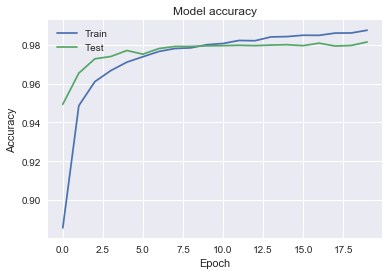

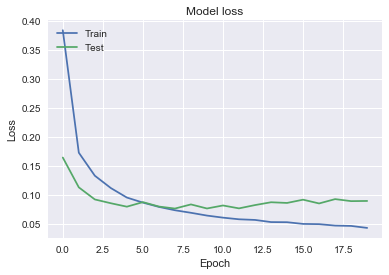

In [17]:
plot_history(history)

## Batch 8

In [18]:
batch_size = 8
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 16s - loss: 0.3087 - acc: 0.9164 - val_loss: 0.1839 - val_acc: 0.9534
Epoch 2/20
 - 16s - loss: 0.2369 - acc: 0.9500 - val_loss: 0.1953 - val_acc: 0.9633
Epoch 3/20
 - 15s - loss: 0.2390 - acc: 0.9570 - val_loss: 0.1756 - val_acc: 0.9677
Epoch 4/20
 - 14s - loss: 0.2476 - acc: 0.9593 - val_loss: 0.2088 - val_acc: 0.9685
Epoch 5/20
 - 15s - loss: 0.2597 - acc: 0.9610 - val_loss: 0.2127 - val_acc: 0.9705
Epoch 6/20
 - 15s - loss: 0.2764 - acc: 0.9617 - val_loss: 0.2165 - val_acc: 0.9715
Epoch 7/20
 - 15s - loss: 0.2756 - acc: 0.9637 - val_loss: 0.2222 - val_acc: 0.9732
Epoch 8/20
 - 15s - loss: 0.2935 - acc: 0.9630 - val_loss: 0.2925 - val_acc: 0.9675
Epoch 9/20
 - 15s - loss: 0.3084 - acc: 0.9624 - val_loss: 0.2297 - val_acc: 0.9720
Epoch 10/20
 - 15s - loss: 0.3172 - acc: 0.9640 - val_loss: 0.2717 - val_acc: 0.9708
Epoch 11/20
 - 15s - loss: 0.3328 - acc: 0.9631 - val_loss: 0.2830 - val_acc: 0.9700
Epoch 12/20
 - 16s - los

#### Evaluate trained model with test data

In [39]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 30us/step
batch_size:  16 , score:  [0.15499717594219178, 0.9778] , time_delta:  -150.92288327217102


## Batch 16

In [45]:
batch_size = 16
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 11s - loss: 0.2959 - acc: 0.9145 - val_loss: 0.1489 - val_acc: 0.9595
Epoch 2/20
 - 10s - loss: 0.1832 - acc: 0.9524 - val_loss: 0.1262 - val_acc: 0.9692
Epoch 3/20
 - 10s - loss: 0.1729 - acc: 0.9607 - val_loss: 0.1297 - val_acc: 0.9707
Epoch 4/20
 - 10s - loss: 0.1715 - acc: 0.9632 - val_loss: 0.1556 - val_acc: 0.9678
Epoch 5/20
 - 10s - loss: 0.1729 - acc: 0.9657 - val_loss: 0.1577 - val_acc: 0.9707
Epoch 6/20
 - 10s - loss: 0.1782 - acc: 0.9670 - val_loss: 0.1646 - val_acc: 0.9712
Epoch 7/20
 - 12s - loss: 0.1873 - acc: 0.9668 - val_loss: 0.1687 - val_acc: 0.9733
Epoch 8/20
 - 11s - loss: 0.2007 - acc: 0.9673 - val_loss: 0.1840 - val_acc: 0.9730
Epoch 9/20
 - 10s - loss: 0.1869 - acc: 0.9684 - val_loss: 0.1762 - val_acc: 0.9766
Epoch 10/20
 - 10s - loss: 0.1932 - acc: 0.9698 - val_loss: 0.1938 - val_acc: 0.9727
Epoch 11/20
 - 10s - loss: 0.1961 - acc: 0.9696 - val_loss: 0.1994 - val_acc: 0.9716
Epoch 12/20
 - 10s - los

#### Evaluate trained model with test data

In [46]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 30us/step
batch_size:  16 , score:  [0.21041810289355808, 0.9764] , time_delta:  203.56255316734314


## Batch 32

In [24]:
batch_size = 32
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 5s - loss: 0.3066 - acc: 0.9074 - val_loss: 0.1329 - val_acc: 0.9596
Epoch 2/20
 - 5s - loss: 0.1610 - acc: 0.9543 - val_loss: 0.1082 - val_acc: 0.9684
Epoch 3/20
 - 5s - loss: 0.1345 - acc: 0.9625 - val_loss: 0.1089 - val_acc: 0.9720
Epoch 4/20
 - 5s - loss: 0.1232 - acc: 0.9664 - val_loss: 0.1015 - val_acc: 0.9731
Epoch 5/20
 - 5s - loss: 0.1170 - acc: 0.9710 - val_loss: 0.1014 - val_acc: 0.9757
Epoch 6/20
 - 5s - loss: 0.1131 - acc: 0.9723 - val_loss: 0.1125 - val_acc: 0.9767
Epoch 7/20
 - 5s - loss: 0.1073 - acc: 0.9743 - val_loss: 0.1271 - val_acc: 0.9744
Epoch 8/20
 - 5s - loss: 0.1093 - acc: 0.9746 - val_loss: 0.1232 - val_acc: 0.9773
Epoch 9/20
 - 5s - loss: 0.1079 - acc: 0.9760 - val_loss: 0.1200 - val_acc: 0.9781
Epoch 10/20
 - 5s - loss: 0.1052 - acc: 0.9763 - val_loss: 0.1227 - val_acc: 0.9777
Epoch 11/20
 - 5s - loss: 0.1030 - acc: 0.9771 - val_loss: 0.1396 - val_acc: 0.9772
Epoch 12/20
 - 5s - loss: 0.1049 - 

#### Evaluate trained model with test data

In [25]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 25us/step
Batch_size: 8
Test loss: 0.27601957293532087
Test accuracy: 0.9739
Time (seconds):  302.4911150932312
[0.16117237335800802, 0.9766] 101.01155591011047


## Batch 64

In [26]:
batch_size = 64
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.3248 - acc: 0.9030 - val_loss: 0.1433 - val_acc: 0.9572
Epoch 2/20
 - 3s - loss: 0.1558 - acc: 0.9530 - val_loss: 0.1002 - val_acc: 0.9706
Epoch 3/20
 - 3s - loss: 0.1218 - acc: 0.9651 - val_loss: 0.1002 - val_acc: 0.9705
Epoch 4/20
 - 3s - loss: 0.1068 - acc: 0.9690 - val_loss: 0.0883 - val_acc: 0.9746
Epoch 5/20
 - 3s - loss: 0.0969 - acc: 0.9732 - val_loss: 0.0970 - val_acc: 0.9757
Epoch 6/20
 - 3s - loss: 0.0908 - acc: 0.9739 - val_loss: 0.0916 - val_acc: 0.9756
Epoch 7/20
 - 3s - loss: 0.0831 - acc: 0.9774 - val_loss: 0.0875 - val_acc: 0.9778
Epoch 8/20
 - 3s - loss: 0.0792 - acc: 0.9782 - val_loss: 0.0844 - val_acc: 0.9786
Epoch 9/20
 - 3s - loss: 0.0744 - acc: 0.9796 - val_loss: 0.0898 - val_acc: 0.9778
Epoch 10/20
 - 3s - loss: 0.0736 - acc: 0.9795 - val_loss: 0.0933 - val_acc: 0.9806
Epoch 11/20
 - 3s - loss: 0.0696 - acc: 0.9813 - val_loss: 0.0888 - val_acc: 0.9785
Epoch 12/20
 - 3s - loss: 0.0696 - 

#### Evaluate trained model with test data

In [27]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 25us/step
Batch_size: 8
Test loss: 0.27601957293532087
Test accuracy: 0.9739
Time (seconds):  302.4911150932312
[0.1009105070710471, 0.9811] 62.92078518867493


## Batch 128

In [28]:
batch_size = 128
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.3832 - acc: 0.8858 - val_loss: 0.1564 - val_acc: 0.9533
Epoch 2/20
 - 2s - loss: 0.1791 - acc: 0.9465 - val_loss: 0.1133 - val_acc: 0.9656
Epoch 3/20
 - 2s - loss: 0.1335 - acc: 0.9598 - val_loss: 0.1006 - val_acc: 0.9684
Epoch 4/20
 - 2s - loss: 0.1115 - acc: 0.9667 - val_loss: 0.0837 - val_acc: 0.9762
Epoch 5/20
 - 2s - loss: 0.0959 - acc: 0.9705 - val_loss: 0.0800 - val_acc: 0.9759
Epoch 6/20
 - 2s - loss: 0.0882 - acc: 0.9724 - val_loss: 0.0769 - val_acc: 0.9767
Epoch 7/20
 - 2s - loss: 0.0790 - acc: 0.9757 - val_loss: 0.0739 - val_acc: 0.9779
Epoch 8/20
 - 2s - loss: 0.0742 - acc: 0.9775 - val_loss: 0.0751 - val_acc: 0.9789
Epoch 9/20
 - 2s - loss: 0.0690 - acc: 0.9791 - val_loss: 0.0695 - val_acc: 0.9801
Epoch 10/20
 - 2s - loss: 0.0646 - acc: 0.9803 - val_loss: 0.0713 - val_acc: 0.9791
Epoch 11/20
 - 2s - loss: 0.0609 - acc: 0.9815 - val_loss: 0.0775 - val_acc: 0.9796
Epoch 12/20
 - 2s - loss: 0.0572 - 

#### Evaluate trained model with test data

In [29]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 25us/step
Batch_size: 8
Test loss: 0.27601957293532087
Test accuracy: 0.9739
Time (seconds):  302.4911150932312
[0.07987348379990145, 0.9811] 43.45180058479309


## Batch 256

In [30]:
batch_size = 256
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.4581 - acc: 0.8655 - val_loss: 0.2059 - val_acc: 0.9391
Epoch 2/20
 - 1s - loss: 0.2005 - acc: 0.9404 - val_loss: 0.1316 - val_acc: 0.9600
Epoch 3/20
 - 1s - loss: 0.1485 - acc: 0.9551 - val_loss: 0.1047 - val_acc: 0.9686
Epoch 4/20
 - 1s - loss: 0.1204 - acc: 0.9635 - val_loss: 0.0919 - val_acc: 0.9728
Epoch 5/20
 - 1s - loss: 0.1034 - acc: 0.9682 - val_loss: 0.0824 - val_acc: 0.9754
Epoch 6/20
 - 1s - loss: 0.0935 - acc: 0.9712 - val_loss: 0.0819 - val_acc: 0.9745
Epoch 7/20
 - 1s - loss: 0.0802 - acc: 0.9753 - val_loss: 0.0852 - val_acc: 0.9727
Epoch 8/20
 - 1s - loss: 0.0744 - acc: 0.9768 - val_loss: 0.0713 - val_acc: 0.9792
Epoch 9/20
 - 1s - loss: 0.0678 - acc: 0.9788 - val_loss: 0.0729 - val_acc: 0.9782
Epoch 10/20
 - 1s - loss: 0.0643 - acc: 0.9800 - val_loss: 0.0697 - val_acc: 0.9796
Epoch 11/20
 - 1s - loss: 0.0592 - acc: 0.9816 - val_loss: 0.0662 - val_acc: 0.9803
Epoch 12/20
 - 1s - loss: 0.0548 - 

#### Evaluate trained model with test data

In [31]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 26us/step
Batch_size: 8
Test loss: 0.27601957293532087
Test accuracy: 0.9739
Time (seconds):  302.4911150932312
[0.07142710163630582, 0.9822] 29.069130659103394


## Batch 512

In [32]:
batch_size = 512
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.5622 - acc: 0.8341 - val_loss: 0.2657 - val_acc: 0.9171
Epoch 2/20
 - 1s - loss: 0.2503 - acc: 0.9257 - val_loss: 0.1740 - val_acc: 0.9457
Epoch 3/20
 - 1s - loss: 0.1853 - acc: 0.9450 - val_loss: 0.1342 - val_acc: 0.9585
Epoch 4/20
 - 1s - loss: 0.1478 - acc: 0.9558 - val_loss: 0.1240 - val_acc: 0.9629
Epoch 5/20
 - 1s - loss: 0.1241 - acc: 0.9627 - val_loss: 0.0999 - val_acc: 0.9693
Epoch 6/20
 - 1s - loss: 0.1086 - acc: 0.9673 - val_loss: 0.0863 - val_acc: 0.9716
Epoch 7/20
 - 2s - loss: 0.0955 - acc: 0.9712 - val_loss: 0.0826 - val_acc: 0.9744
Epoch 8/20
 - 1s - loss: 0.0870 - acc: 0.9736 - val_loss: 0.0766 - val_acc: 0.9763
Epoch 9/20
 - 1s - loss: 0.0813 - acc: 0.9750 - val_loss: 0.0755 - val_acc: 0.9778
Epoch 10/20
 - 1s - loss: 0.0735 - acc: 0.9769 - val_loss: 0.0734 - val_acc: 0.9770
Epoch 11/20
 - 1s - loss: 0.0675 - acc: 0.9789 - val_loss: 0.0731 - val_acc: 0.9787
Epoch 12/20
 - 1s - loss: 0.0622 - 

#### Evaluate trained model with test data

In [41]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 30us/step
batch_size:  16 , score:  [0.15499717594219178, 0.9778] , time_delta:  -150.92288327217102


## Batch 1024

In [49]:
batch_size = 1024
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.7385 - acc: 0.7800 - val_loss: 0.2980 - val_acc: 0.9140
Epoch 2/20
 - 1s - loss: 0.3296 - acc: 0.9016 - val_loss: 0.2302 - val_acc: 0.9295
Epoch 3/20
 - 1s - loss: 0.2454 - acc: 0.9267 - val_loss: 0.1621 - val_acc: 0.9524
Epoch 4/20
 - 1s - loss: 0.1972 - acc: 0.9422 - val_loss: 0.1354 - val_acc: 0.9578
Epoch 5/20
 - 1s - loss: 0.1656 - acc: 0.9504 - val_loss: 0.1186 - val_acc: 0.9635
Epoch 6/20
 - 1s - loss: 0.1435 - acc: 0.9577 - val_loss: 0.1040 - val_acc: 0.9675
Epoch 7/20
 - 1s - loss: 0.1298 - acc: 0.9607 - val_loss: 0.1013 - val_acc: 0.9686
Epoch 8/20
 - 1s - loss: 0.1160 - acc: 0.9645 - val_loss: 0.0916 - val_acc: 0.9710
Epoch 9/20
 - 1s - loss: 0.1054 - acc: 0.9672 - val_loss: 0.0883 - val_acc: 0.9722
Epoch 10/20
 - 1s - loss: 0.0965 - acc: 0.9702 - val_loss: 0.0809 - val_acc: 0.9758
Epoch 11/20
 - 1s - loss: 0.0900 - acc: 0.9717 - val_loss: 0.0783 - val_acc: 0.9751
Epoch 12/20
 - 1s - loss: 0.0849 - 

#### Evaluate trained model with test data

In [50]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 32us/step
batch_size:  1024 , score:  [0.07161920275175071, 0.9782] , time_delta:  26.30062770843506


## Batch 2048

In [51]:
batch_size = 2048
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.9522 - acc: 0.7217 - val_loss: 0.3991 - val_acc: 0.8905
Epoch 2/20
 - 1s - loss: 0.4352 - acc: 0.8715 - val_loss: 0.3013 - val_acc: 0.9097
Epoch 3/20
 - 1s - loss: 0.3273 - acc: 0.9038 - val_loss: 0.2446 - val_acc: 0.9246
Epoch 4/20
 - 1s - loss: 0.2727 - acc: 0.9203 - val_loss: 0.2103 - val_acc: 0.9342
Epoch 5/20
 - 1s - loss: 0.2350 - acc: 0.9305 - val_loss: 0.1770 - val_acc: 0.9468
Epoch 6/20
 - 1s - loss: 0.2023 - acc: 0.9406 - val_loss: 0.1605 - val_acc: 0.9502
Epoch 7/20
 - 1s - loss: 0.1809 - acc: 0.9461 - val_loss: 0.1321 - val_acc: 0.9575
Epoch 8/20
 - 1s - loss: 0.1645 - acc: 0.9510 - val_loss: 0.1196 - val_acc: 0.9621
Epoch 9/20
 - 1s - loss: 0.1478 - acc: 0.9559 - val_loss: 0.1136 - val_acc: 0.9631
Epoch 10/20
 - 1s - loss: 0.1350 - acc: 0.9602 - val_loss: 0.1045 - val_acc: 0.9673
Epoch 11/20
 - 1s - loss: 0.1253 - acc: 0.9628 - val_loss: 0.1024 - val_acc: 0.9678
Epoch 12/20
 - 1s - loss: 0.1166 - 

#### Evaluate trained model with test data

In [52]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 33us/step
batch_size:  2048 , score:  [0.07682823078420478, 0.9758] , time_delta:  26.720767498016357


## Batch 4096

In [57]:
batch_size = 4096
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 1.3089 - acc: 0.6161 - val_loss: 0.6341 - val_acc: 0.8230
Epoch 2/20
 - 1s - loss: 0.6230 - acc: 0.8161 - val_loss: 0.4078 - val_acc: 0.8852
Epoch 3/20
 - 1s - loss: 0.4727 - acc: 0.8609 - val_loss: 0.3236 - val_acc: 0.9076
Epoch 4/20
 - 1s - loss: 0.3866 - acc: 0.8860 - val_loss: 0.2841 - val_acc: 0.9170
Epoch 5/20
 - 1s - loss: 0.3406 - acc: 0.9006 - val_loss: 0.2452 - val_acc: 0.9265
Epoch 6/20
 - 1s - loss: 0.3029 - acc: 0.9108 - val_loss: 0.2257 - val_acc: 0.9315
Epoch 7/20
 - 1s - loss: 0.2710 - acc: 0.9201 - val_loss: 0.2049 - val_acc: 0.9375
Epoch 8/20
 - 1s - loss: 0.2473 - acc: 0.9274 - val_loss: 0.1808 - val_acc: 0.9432
Epoch 9/20
 - 1s - loss: 0.2252 - acc: 0.9335 - val_loss: 0.1665 - val_acc: 0.9493
Epoch 10/20
 - 1s - loss: 0.2083 - acc: 0.9386 - val_loss: 0.1590 - val_acc: 0.9503
Epoch 11/20
 - 1s - loss: 0.1958 - acc: 0.9419 - val_loss: 0.1462 - val_acc: 0.9534
Epoch 12/20
 - 1s - loss: 0.1779 - 

#### Evaluate trained model with test data

In [58]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 33us/step
batch_size:  4096 , score:  [0.09552331715263426, 0.9704] , time_delta:  24.452287912368774


In [60]:
batch_size_list = [batch_size_8, batch_size_16, batch_size_32, batch_size_64, batch_size_128, batch_size_256, batch_size_512, batch_size_1024, batch_size_2048, batch_size_4096]
test_loss_list = [test_loss_8, test_loss_16, test_loss_32, test_loss_64, test_loss_128, test_loss_256, test_loss_512, test_loss_1024, test_loss_2048, test_loss_4096]
test_acc_list = [test_acc_8, test_acc_16, test_acc_32, test_acc_64, test_acc_128, test_acc_256, test_acc_512, test_acc_1024, test_acc_2048, test_acc_4096]
td_list = [td_8, td_16, td_32, td_64, td_128, td_256, td_512, td_1024, td_2048, td_4096]

In [66]:
print(batch_size_list)
print(test_loss_list)
print(test_acc_list)
print(td_list)

[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
[0.27601957293532087, 0.21041810289355808, 0.16117237335800802, 0.1009105070710471, 0.07987348379990145, 0.07142710163630582, 0.07104845661275613, 0.07161920275175071, 0.07682823078420478, 0.09552331715263426]
[0.9739, 0.9764, 0.9766, 0.9811, 0.9811, 0.9822, 0.981, 0.9782, 0.9758, 0.9704]
[302.4911150932312, 203.56255316734314, 101.01155591011047, 62.92078518867493, 43.45180058479309, 29.069130659103394, 29.21120572090149, 26.30062770843506, 26.720767498016357, 24.452287912368774]


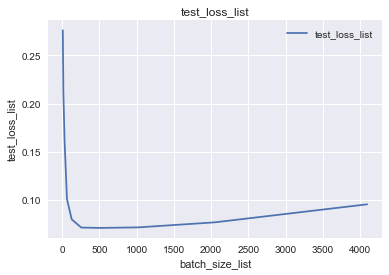

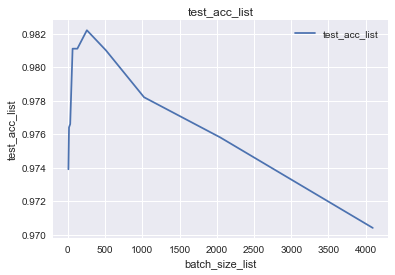

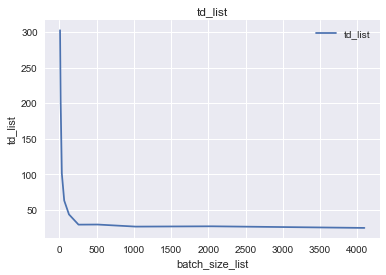

In [69]:
# Plot training & validation accuracy values
plt.plot(batch_size_list,test_loss_list)
plt.title('test_loss_list')
plt.ylabel('test_loss_list')
plt.xlabel('batch_size_list')
plt.legend(['test_loss_list'], loc='upper right')
plt.show()

plt.plot(batch_size_list,test_acc_list)
plt.title('test_acc_list')
plt.ylabel('test_acc_list')
plt.xlabel('batch_size_list')
plt.legend(['test_acc_list'], loc='upper right')
plt.show()

plt.plot(batch_size_list,td_list)
plt.title('td_list')
plt.ylabel('td_list')
plt.xlabel('batch_size_list')
plt.legend(['td_list'], loc='upper right')
plt.show()